# Regression Lineaire numpy

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1 Etape data set 

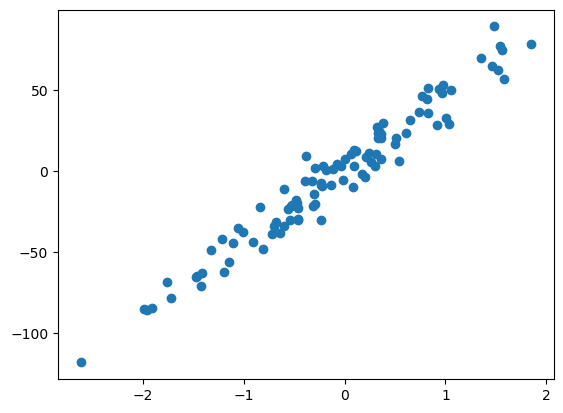

In [2]:
x, y = make_regression(n_samples=100, n_features=1, noise=10 ,random_state=42)
plt.scatter(x, y)

In [3]:
y = y.reshape(y.shape[0], 1)
y.shape

(100, 1)

In [4]:
X = np.concatenate((x, np.ones(x.shape)), axis=1)
#X = np.hstack((x, np.ones(x.shape)))
print(X)

[[ 0.93128012  1.        ]
 [ 0.08704707  1.        ]
 [-1.05771093  1.        ]
 [ 0.31424733  1.        ]
 [-0.47917424  1.        ]
 [ 0.64768854  1.        ]
 [-0.46341769  1.        ]
 [ 0.54256004  1.        ]
 [ 0.61167629  1.        ]
 [ 1.0035329   1.        ]
 [ 0.8219025   1.        ]
 [ 1.53803657  1.        ]
 [ 0.73846658  1.        ]
 [-0.21967189  1.        ]
 [-0.8084936   1.        ]
 [ 0.09176078  1.        ]
 [-1.95967012  1.        ]
 [ 0.51326743  1.        ]
 [ 1.03099952  1.        ]
 [-2.6197451   1.        ]
 [ 0.49671415  1.        ]
 [ 0.09707755  1.        ]
 [-0.46572975  1.        ]
 [ 0.91540212  1.        ]
 [ 1.56464366  1.        ]
 [ 1.46564877  1.        ]
 [-0.60063869  1.        ]
 [-0.03582604  1.        ]
 [-0.60170661  1.        ]
 [-1.19620662  1.        ]
 [ 0.35711257  1.        ]
 [ 0.37569802  1.        ]
 [ 0.26105527  1.        ]
 [-0.5297602   1.        ]
 [-0.90802408  1.        ]
 [ 0.19686124  1.        ]
 [-0.29900735  1.        ]
 

In [5]:
theta = np.random.randn(2, 1)
theta

array([[-0.23643882],
       [-2.6652922 ]])

# 2 Modele

In [6]:
def model(X, theta):
    return X.dot(theta)

[[-2.88548297]
 [-2.68587351]
 [-2.41520828]
 [-2.73959247]
 [-2.55199681]
 [-2.81843091]
 [-2.55572227]
 [-2.79357445]
 [-2.80991622]
 [-2.90256633]
 [-2.85962185]
 [-3.02894374]
 [-2.83989436]
 [-2.61335324]
 [-2.47413293]
 [-2.68698801]
 [-2.20195012]
 [-2.78664854]
 [-2.9090605 ]
 [-2.04588277]
 [-2.78273471]
 [-2.6882451 ]
 [-2.55517561]
 [-2.88172879]
 [-3.03523469]
 [-3.01182846]
 [-2.5232779 ]
 [-2.65682153]
 [-2.5230254 ]
 [-2.38246252]
 [-2.74972747]
 [-2.75412179]
 [-2.7270158 ]
 [-2.54003632]
 [-2.45060006]
 [-2.71183784]
 [-2.59459526]
 [-2.75079699]
 [-2.85977374]
 [-2.59632447]
 [-2.75074015]
 [-2.50524156]
 [-3.02539557]
 [-2.542753  ]
 [-2.60992925]
 [-2.57258261]
 [-2.5940996 ]
 [-2.51276085]
 [-2.74302172]
 [-2.71467566]
 [-2.58782015]
 [-2.66650122]
 [-2.60993313]
 [-3.01472372]
 [-2.5742438 ]
 [-2.7465369 ]
 [-2.74361573]
 [-2.62139521]
 [-2.6098267 ]
 [-2.19535376]
 [-2.74191823]
 [-2.61190992]
 [-2.40371167]
 [-2.4992996 ]
 [-2.31926046]
 [-2.89431747]
 [-2.25745

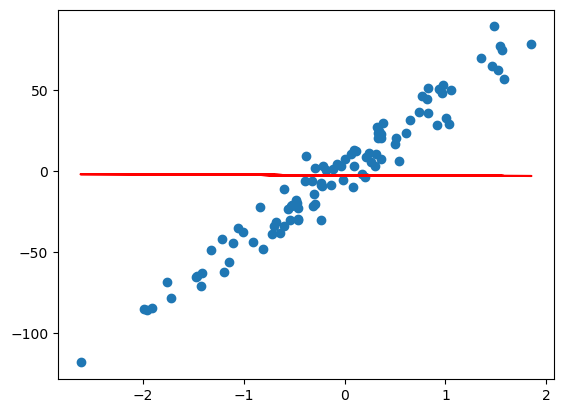

In [7]:
F = model(X, theta)
print(F)
plt.scatter(x, y)
plt.plot(x, F, c='r')

# 3 Fonction cout

In [8]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/2 * m * np.sum((model(X, theta) - y)**2)

In [9]:
cost_function(X, y, theta)

8541336.570838027

# 4 Gradients et Descente de Gradient

In [10]:
def grad(X, y, theta):
    m = len(y)
    return (1/m) * (X.T.dot(model(X, theta) - y))

In [11]:
grad(X, y, theta)

array([[-36.56098325],
       [  0.80879117]])

In [12]:
def gradient_descente(X, y, theta, learning_rate = 0.01, n_iter=1000):
    cost_history = np.zeros(n_iter)
    for i in range(0, n_iter):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

# 5 ML

In [13]:
theta_finale, cost_history = gradient_descente(X, y, theta, learning_rate=0.01, n_iter=750)

In [14]:
theta_finale

array([[44.32639454],
       [ 1.11946219]])

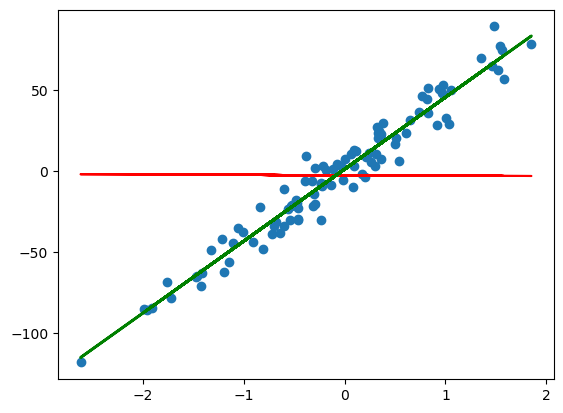

In [15]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')
plt.plot(x, model(X, theta_finale), c='g', lw=2)

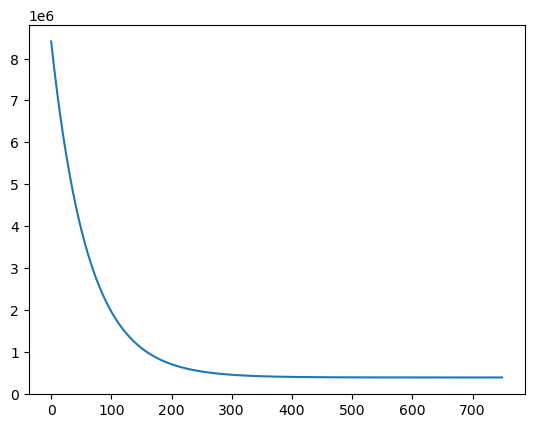

In [16]:
plt.plot(range(750),cost_history)

In [17]:
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u/v

In [18]:
prediction = model(X, theta_finale)
print(coef_determination(y, prediction))

0.9538186286943713
